In [1]:
import sklearn
from tsai.basics import *
my_setup(sklearn)

os              : Linux-4.18.0-348.7.1.el8_5.x86_64-x86_64-with-glibc2.28
python          : 3.9.9
tsai            : 0.3.9
fastai          : 2.7.14
fastcore        : 1.5.29
sklearn         : 1.4.1.post1
torch           : 2.2.1+cu121
device          : 1 gpu (['NVIDIA A100-SXM4-80GB MIG 3g.40gb'])
cpu cores       : 64
threads per cpu : 1
RAM             : 503.48 GB
GPU memory      : [80.0] GB


In [2]:
df_raw = pd.read_csv("./ADANIGREEN_minute_data_with_indicators.csv")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370572 entries, 0 to 370571
Data columns (total 60 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          370572 non-null  object 
 1   close         370572 non-null  float64
 2   high          370572 non-null  float64
 3   low           370572 non-null  float64
 4   open          370572 non-null  float64
 5   volume        370572 non-null  int64  
 6   sma5          370572 non-null  float64
 7   sma10         370572 non-null  float64
 8   sma15         370572 non-null  float64
 9   sma20         370572 non-null  float64
 10  ema5          370572 non-null  float64
 11  ema10         370572 non-null  float64
 12  ema15         370572 non-null  float64
 13  ema20         370572 non-null  float64
 14  upperband     370572 non-null  float64
 15  middleband    370572 non-null  float64
 16  lowerband     370572 non-null  float64
 17  HT_TRENDLINE  370572 non-null  float64
 18  KAMA

In [4]:
df_raw

,date,close,high,low,open,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2018-06-18 10:47:00+05:30,31.00,31.00,31.00,31.0,1250,30.65,30.830,30.953333,31.0075,...,86.666667,100.000000,96.975125,46.774423,-33.333333,0.316207,0.00,31.000000,23.712805,0.601823
1,2018-06-18 10:48:00+05:30,31.00,31.00,31.00,31.0,4715,30.83,30.800,30.953333,30.9825,...,100.000000,100.000000,100.000000,49.033151,-31.034483,0.293621,0.00,31.000000,23.164765,0.182776
2,2018-06-18 10:49:00+05:30,31.20,31.20,31.00,31.0,4106,30.99,30.810,30.936667,30.9725,...,100.000000,100.000000,100.000000,63.473733,-14.285714,0.286934,0.20,31.133333,22.651024,0.569543
3,2018-06-18 10:50:00+05:30,31.20,31.20,31.00,31.0,5054,31.08,30.805,30.950000,30.9825,...,100.000000,100.000000,100.000000,76.330937,-14.285714,0.280724,0.20,31.133333,21.983865,0.424208
4,2018-06-18 10:51:00+05:30,31.20,31.25,31.20,31.2,3844,31.12,30.835,30.953333,30.9925,...,93.333333,100.000000,100.000000,75.847655,-14.285714,0.264244,0.05,31.216667,21.266293,-0.421224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370567,2022-10-24 19:10:00+05:30,2126.70,2127.00,2123.85,2125.0,680,2123.53,2120.975,2120.733333,2120.6000,...,89.632035,100.000000,100.000000,57.343708,-7.359307,3.216471,3.15,2125.850000,15.533100,0.056885
370568,2022-10-24 19:11:00+05:30,2129.00,2129.80,2126.30,2126.7,2511,2125.57,2121.975,2121.333333,2121.1000,...,87.763348,100.000000,100.000000,58.129053,-5.797101,3.236723,3.50,2128.366667,15.183249,-0.512125
370569,2022-10-24 19:12:00+05:30,2129.05,2129.85,2127.00,2129.0,1102,2126.92,2122.930,2121.953333,2121.5400,...,92.664898,100.000000,100.000000,69.529794,-5.776173,3.209100,2.85,2128.633333,14.694527,-1.134626
370570,2022-10-24 19:13:00+05:30,2125.00,2129.80,2125.00,2129.0,1632,2126.95,2123.550,2122.240000,2121.7450,...,80.217847,0.000000,66.666667,59.269975,-35.018051,3.322736,4.80,2126.600000,14.563530,-0.668820


In [5]:
df_new = df_raw[['date', 'close', 'high', 'low', 'open', 'volume']].copy()

In [6]:
df_new

,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,31.00,31.00,31.00,31.0,1250
1,2018-06-18 10:48:00+05:30,31.00,31.00,31.00,31.0,4715
2,2018-06-18 10:49:00+05:30,31.20,31.20,31.00,31.0,4106
3,2018-06-18 10:50:00+05:30,31.20,31.20,31.00,31.0,5054
4,2018-06-18 10:51:00+05:30,31.20,31.25,31.20,31.2,3844
...,...,...,...,...,...,...
370567,2022-10-24 19:10:00+05:30,2126.70,2127.00,2123.85,2125.0,680
370568,2022-10-24 19:11:00+05:30,2129.00,2129.80,2126.30,2126.7,2511
370569,2022-10-24 19:12:00+05:30,2129.05,2129.85,2127.00,2129.0,1102
370570,2022-10-24 19:13:00+05:30,2125.00,2129.80,2125.00,2129.0,1632


In [7]:
df_new.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [8]:
zeros_per_column = (df_new == 0).sum()
zeros_per_column

date          0
close         0
high          0
low           0
open          0
volume    18335
dtype: int64

In [9]:
datetime_col = "date"
freq = '1H'
columns = df_new.columns[1:]
method = 'ffill'
#value = 0

# pipeline
preproc_pipe = sklearn.pipeline.Pipeline([
    ('shrinker', TSShrinkDataFrame()), # shrink dataframe memory usage
    ('drop_duplicates', TSDropDuplicates(datetime_col=datetime_col)), # drop duplicate rows (if any)
    ('add_mts', TSAddMissingTimestamps(datetime_col=datetime_col, freq=freq)), # ass missing timestamps (if any)
    ('fill_missing', TSFillMissing(columns=columns, method=method)),# fill missing data (1st ffill. 2nd value=0)
    ], 
    verbose=True)
mkdir('data', exist_ok=True, parents=True)
save_object(preproc_pipe, 'data/preproc_pipe.pkl')
preproc_pipe = load_object('data/preproc_pipe.pkl')

df = preproc_pipe.fit_transform(df_new)
df

data directory already exists.
Pipeline saved as data/preproc_pipe.pkl
Initial memory usage: 16.96 MB  
Final memory usage  : 9.90 MB    (-41.7%)
[Pipeline] .......... (step 1 of 4) Processing shrinker, total=   3.4s
[Pipeline] ... (step 2 of 4) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 4 of 4) Processing fill_missing, total=   0.0s


,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,31.000000,31.000000,31.000000,31.000000,1250.0
1,2018-06-18 11:47:00+05:30,31.000000,31.000000,30.799999,31.000000,277.0
2,2018-06-18 12:47:00+05:30,31.000000,31.450001,31.000000,31.400000,24530.0
3,2018-06-18 13:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
4,2018-06-18 14:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
...,...,...,...,...,...,...
38140,2022-10-24 14:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38141,2022-10-24 15:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38142,2022-10-24 16:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38143,2022-10-24 17:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0


In [10]:
zeros_per_column = (df == 0).sum()
zeros_per_column

date         0
close        0
high         0
low          0
open         0
volume    1618
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38145 entries, 0 to 38144
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                    
---  ------  --------------  -----                    
 0   date    38145 non-null  datetime64[ns, UTC+05:30]
 1   close   38145 non-null  float32                  
 2   high    38145 non-null  float32                  
 3   low     38145 non-null  float32                  
 4   open    38145 non-null  float32                  
 5   volume  38145 non-null  float64                  
dtypes: datetime64[ns, UTC+05:30](1), float32(4), float64(1)
memory usage: 1.2 MB


In [12]:
df.isnull().sum()

date      0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [15]:
#df=df.reset_index(inplace=False)

In [16]:
df

,index,date,close,high,low,open,volume
0,0,2018-06-18 10:47:00+05:30,31.000000,31.000000,31.000000,31.000000,1250.0
1,1,2018-06-18 11:47:00+05:30,31.000000,31.000000,30.799999,31.000000,277.0
2,2,2018-06-18 12:47:00+05:30,31.000000,31.450001,31.000000,31.400000,24530.0
3,3,2018-06-18 13:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
4,4,2018-06-18 14:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
...,...,...,...,...,...,...,...
38140,38140,2022-10-24 14:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38141,38141,2022-10-24 15:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38142,38142,2022-10-24 16:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38143,38143,2022-10-24 17:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0


In [13]:
df

,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,31.000000,31.000000,31.000000,31.000000,1250.0
1,2018-06-18 11:47:00+05:30,31.000000,31.000000,30.799999,31.000000,277.0
2,2018-06-18 12:47:00+05:30,31.000000,31.450001,31.000000,31.400000,24530.0
3,2018-06-18 13:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
4,2018-06-18 14:47:00+05:30,31.500000,31.500000,31.500000,31.500000,0.0
...,...,...,...,...,...,...
38140,2022-10-24 14:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38141,2022-10-24 15:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38142,2022-10-24 16:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0
38143,2022-10-24 17:47:00+05:30,2123.649902,2125.600098,2122.449951,2125.000000,1218.0


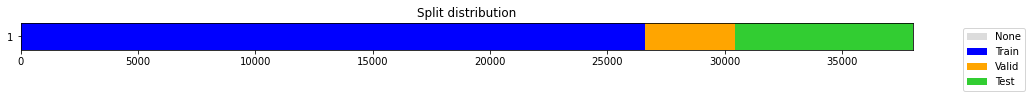

((#26618) [0,1,2,3,4,5,6,7,8,9...],
 (#3803) [26623,26624,26625,26626,26627,26628,26629,26630,26631,26632...],
 (#7605) [30431,30432,30433,30434,30435,30436,30437,30438,30439,30440...])

In [19]:

fcst_history = 104 # # steps in the past
fcst_horizon = 6  # # steps in the future
valid_size   = 0.1  # int or float indicating the size of the training set
test_size    = 0.2  # int or float indicating the size of the test set

splits = get_forecasting_splits(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, datetime_col=datetime_col,
                                valid_size=valid_size, test_size=test_size)
splits

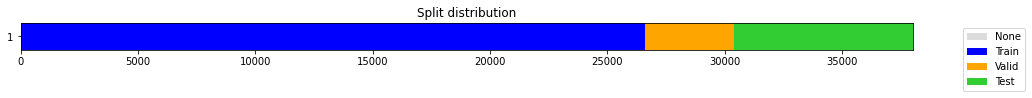

((#26592) [0,1,2,3,4,5,6,7,8,9...],
 (#3810) [26597,26598,26599,26600,26601,26602,26603,26604,26605,26606...],
 (#7624) [30412,30413,30414,30415,30416,30417,30418,30419,30420,30421...])

In [20]:
splits = get_long_term_forecasting_splits(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon)
splits

In [21]:
columns = df.columns[1:]
train_split = splits[0]

# pipeline
exp_pipe = sklearn.pipeline.Pipeline([
    ('scaler', TSStandardScaler(columns=columns)), # standardize data using train_split
    ], 
    verbose=True)
save_object(exp_pipe, 'data/exp_pipe.pkl')
exp_pipe = load_object('data/exp_pipe.pkl')

df_scaled = exp_pipe.fit_transform(df, scaler__idxs=train_split)
df_scaled

data directory already exists.
Pipeline saved as data/exp_pipe.pkl
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,-0.773996,-0.773954,-0.773962,-0.773938,-0.198039
1,2018-06-18 11:47:00+05:30,-0.773996,-0.773954,-0.774434,-0.773938,-0.280209
2,2018-06-18 12:47:00+05:30,-0.773996,-0.772895,-0.773962,-0.772996,1.767962
3,2018-06-18 13:47:00+05:30,-0.772817,-0.772777,-0.772783,-0.772760,-0.303602
4,2018-06-18 14:47:00+05:30,-0.772817,-0.772777,-0.772783,-0.772760,-0.303602
...,...,...,...,...,...,...
38140,2022-10-24 14:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38141,2022-10-24 15:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38142,2022-10-24 16:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38143,2022-10-24 17:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742


In [22]:
x_vars = df.columns[1:]
y_vars = df.columns[1:]

In [23]:
X, y = prepare_forecasting_data(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, x_vars=x_vars, y_vars=y_vars)
X.shape, y.shape

((38036, 5, 104), (38036, 5, 6))

In [52]:
arch_config = dict(
    n_layers=3,  # number of encoder layers
    n_heads=4,  # number of heads
    d_model=16,  # dimension of model
    d_ff=128,  # dimension of fully connected network
    attn_dropout=0.0, # dropout applied to the attention weights
    dropout=0.3,  # dropout applied to all linear layers in the encoder except q,k&v projections
    patch_len=24,  # length of the patch applied to the time series to create patches
    stride=3,  # stride used when creating patches
    padding_patch=True,  # padding_patch
)

In [53]:

learn = TSForecaster(X, y, splits=splits, batch_size=16, path="models", pipelines=[preproc_pipe, exp_pipe],
                     arch="PatchTST", arch_config=arch_config, metrics=[mse, mae], cbs=[ShowGraph()])


In [54]:
#comment later
learn.dls.valid.drop_last = True

In [55]:

learn.summary()

not enough values to plot a chart


PatchTST (Input shape: 16 x 5 x 104)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 5 x 6          
RevIN                                     10         True      
____________________________________________________________________________
                     16 x 5 x 107        
ReplicationPad1d                                               
____________________________________________________________________________
                     16 x 24 x 28        
Unfold                                                         
____________________________________________________________________________
                     16 x 5 x 28 x 16    
Linear                                    400        True      
Dropout                                                        
Linear                                    272        True      
Linear                                    272        True      
Linear                                    272       

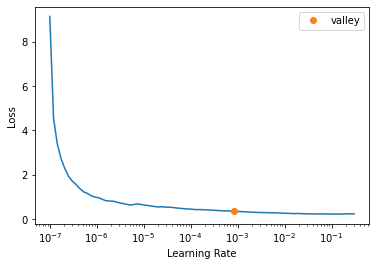

In [57]:
#Whenever you need to look for a good learning rate to train a model you can use:

lr_max = learn.lr_find().valley

In [58]:
lr_max

0.0008317637839354575

In [59]:
learn.dls.device

device(type='cuda', index=0)

epoch,train_loss,valid_loss,mse,mae,time
0,0.082646,0.006160,0.006160,0.030430,00:25
1,0.033604,0.005561,0.005561,0.028799,00:24
2,0.030135,0.005381,0.005381,0.025219,00:24
3,0.059229,0.005490,0.005490,0.026406,00:24
4,0.053380,0.005454,0.005454,0.025578,00:24


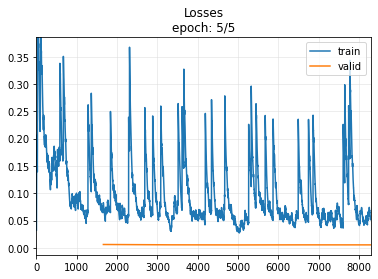

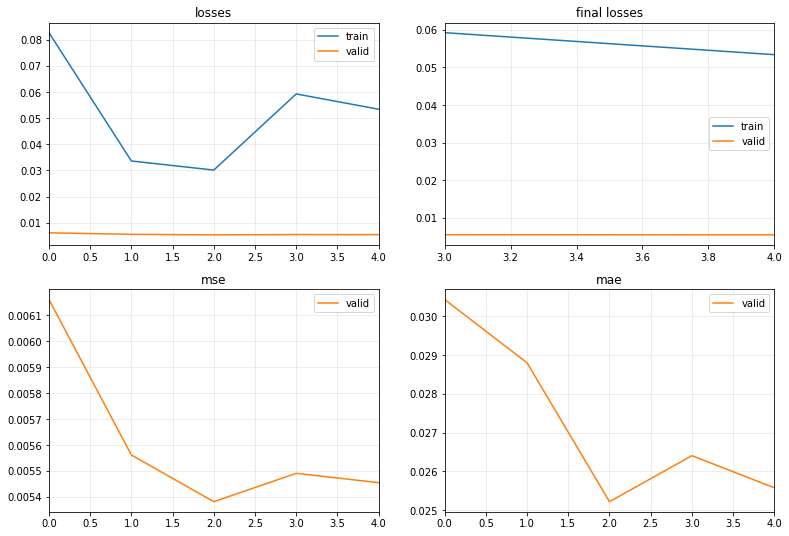

In [60]:

n_epochs = 5
#lr_max = 0.0025
learn.fit_one_cycle(n_epochs, lr_max=lr_max)
learn.export('patchTST.pt')

In [33]:
from tsai.inference import load_learner
from sklearn.metrics import mean_squared_error, mean_absolute_error

learn = load_learner('models/patchTST.pt')
scaled_preds, *_ = learn.get_X_preds(X[splits[1]])
scaled_preds = to_np(scaled_preds)
print(f"scaled_preds.shape: {scaled_preds.shape}")

scaled_y_true = y[splits[1]]
results_df = pd.DataFrame(columns=["mse", "mae"])
results_df.loc["valid", "mse"] = mean_squared_error(scaled_y_true.flatten(), scaled_preds.flatten())
results_df.loc["valid", "mae"] = mean_absolute_error(scaled_y_true.flatten(), scaled_preds.flatten())
results_df

scaled_preds.shape: (3810, 5, 6)


,mse,mae
valid,0.004656,0.023698


In [34]:
from tsai.inference import load_learner
from sklearn.metrics import mean_squared_error, mean_absolute_error

learn = load_learner('models/patchTST.pt')
y_test_preds, *_ = learn.get_X_preds(X[splits[2]])
y_test_preds = to_np(y_test_preds)
print(f"y_test_preds.shape: {y_test_preds.shape}")

y_test = y[splits[2]]
results_df = pd.DataFrame(columns=["mse", "mae"])
results_df.loc["test", "mse"] = mean_squared_error(y_test.flatten(), y_test_preds.flatten())
results_df.loc["test", "mae"] = mean_absolute_error(y_test.flatten(), y_test_preds.flatten())
results_df
     

y_test_preds.shape: (7624, 5, 6)


,mse,mae
test,0.029115,0.053366


In [35]:
y_test_preds.shape

(7624, 5, 6)

In [36]:
y_test

array([[[ 2.38928025,  2.38928025,  2.38928025,  2.38928025,
          2.38928025,  2.38928025],
        [ 2.38979114,  2.38979114,  2.38979114,  2.38979114,
          2.38979114,  2.38979114],
        [ 2.38893785,  2.38893785,  2.38893785,  2.38893785,
          2.38893785,  2.38893785],
        [ 2.38775302,  2.38775302,  2.38775302,  2.38775302,
          2.38775302,  2.38775302],
        [-0.25926553, -0.25926553, -0.25926553, -0.25926553,
         -0.25926553, -0.25926553]],

       [[ 2.38928025,  2.38928025,  2.38928025,  2.38928025,
          2.38928025,  2.38928025],
        [ 2.38979114,  2.38979114,  2.38979114,  2.38979114,
          2.38979114,  2.38979114],
        [ 2.38893785,  2.38893785,  2.38893785,  2.38893785,
          2.38893785,  2.38893785],
        [ 2.38775302,  2.38775302,  2.38775302,  2.38775302,
          2.38775302,  2.38775302],
        [-0.25926553, -0.25926553, -0.25926553, -0.25926553,
         -0.25926553, -0.25926553]],

       [[ 2.38928025,  2.3

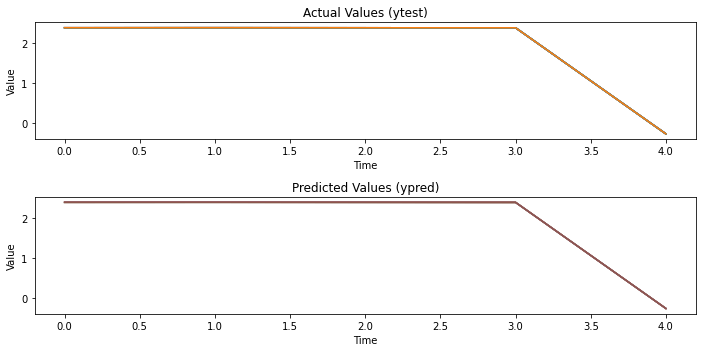

In [37]:
import matplotlib.pyplot as plt

# Assuming ytest and ypred are your arrays of shape (7624, 55, 6)

# Select a sample index to plot
sample_index = 0

# Plot the actual values (ytest)
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(y_test[sample_index])
plt.plot(y_test_preds[sample_index])
plt.title('Actual Values (ytest)')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot the predicted values (ypred)
plt.subplot(2, 1, 2)
plt.plot(y_test_preds[sample_index])
plt.title('Predicted Values (ypred)')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

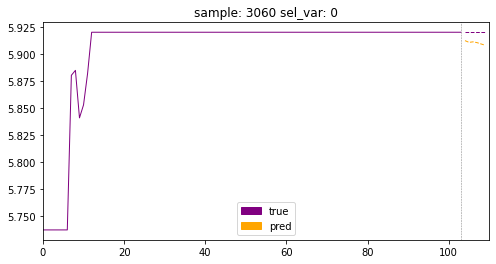

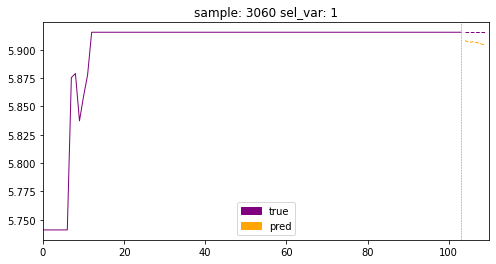

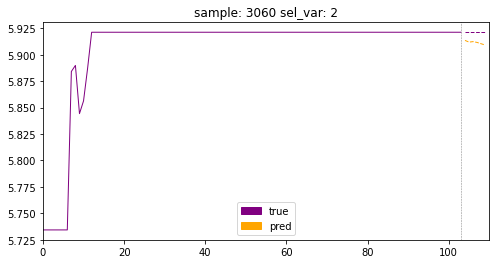

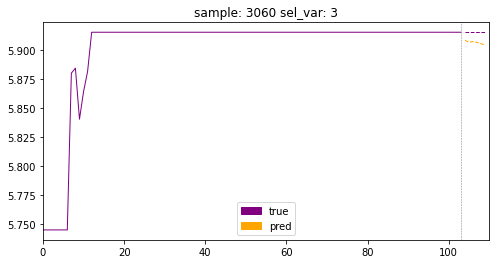

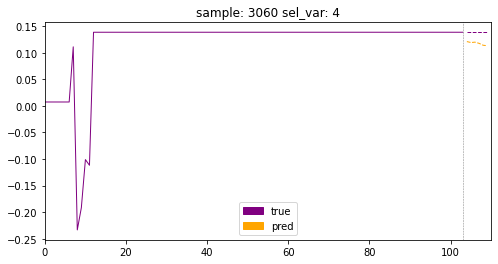

In [38]:
X_test = X[splits[2]]
y_test = y[splits[2]]
plot_forecast(X_test, y_test, y_test_preds, sel_vars=True)

In [42]:
new_df = pd.read_csv("./ADANIGREEN_minute_data_with_indicators.csv")
new_df = new_df[['date', 'close', 'high', 'low', 'open', 'volume']].copy()

In [43]:
new_df

,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,31.00,31.00,31.00,31.0,1250
1,2018-06-18 10:48:00+05:30,31.00,31.00,31.00,31.0,4715
2,2018-06-18 10:49:00+05:30,31.20,31.20,31.00,31.0,4106
3,2018-06-18 10:50:00+05:30,31.20,31.20,31.00,31.0,5054
4,2018-06-18 10:51:00+05:30,31.20,31.25,31.20,31.2,3844
...,...,...,...,...,...,...
370567,2022-10-24 19:10:00+05:30,2126.70,2127.00,2123.85,2125.0,680
370568,2022-10-24 19:11:00+05:30,2129.00,2129.80,2126.30,2126.7,2511
370569,2022-10-24 19:12:00+05:30,2129.05,2129.85,2127.00,2129.0,1102
370570,2022-10-24 19:13:00+05:30,2125.00,2129.80,2125.00,2129.0,1632


In [44]:
new_df

,date,close,high,low,open,volume
0,2018-06-18 10:47:00+05:30,31.00,31.00,31.00,31.0,1250
1,2018-06-18 10:48:00+05:30,31.00,31.00,31.00,31.0,4715
2,2018-06-18 10:49:00+05:30,31.20,31.20,31.00,31.0,4106
3,2018-06-18 10:50:00+05:30,31.20,31.20,31.00,31.0,5054
4,2018-06-18 10:51:00+05:30,31.20,31.25,31.20,31.2,3844
...,...,...,...,...,...,...
370567,2022-10-24 19:10:00+05:30,2126.70,2127.00,2123.85,2125.0,680
370568,2022-10-24 19:11:00+05:30,2129.00,2129.80,2126.30,2126.7,2511
370569,2022-10-24 19:12:00+05:30,2129.05,2129.85,2127.00,2129.0,1102
370570,2022-10-24 19:13:00+05:30,2125.00,2129.80,2125.00,2129.0,1632


In [45]:
from tsai.inference import load_learner

learn = load_learner('models/patchTST.pt')
new_df = learn.transform(new_df)
new_df=new_df.tail(104)

Initial memory usage: 16.96 MB  
Final memory usage  : 9.90 MB    (-41.7%)


In [46]:
new_df

,date,close,high,low,open,volume
38041,2022-10-20 11:47:00+05:30,4.157392,4.153262,4.156836,4.156816,-0.257070
38042,2022-10-20 12:47:00+05:30,4.136653,4.133954,4.137378,4.137257,-0.192212
38043,2022-10-20 13:47:00+05:30,4.148907,4.144549,4.145397,4.142559,-0.225148
38044,2022-10-20 14:47:00+05:30,4.160927,4.156558,4.157072,4.152456,-0.201248
38045,2022-10-20 15:47:00+05:30,4.160927,4.156558,4.157072,4.152456,-0.201248
...,...,...,...,...,...,...
38140,2022-10-24 14:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38141,2022-10-24 15:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38142,2022-10-24 16:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742
38143,2022-10-24 17:47:00+05:30,4.157745,4.157971,4.158959,4.160350,-0.200742


In [47]:

x_feat = new_df.columns[1:]
new_X, _ = prepare_forecasting_data(new_df, fcst_history=fcst_history, fcst_horizon=0, x_vars=x_vars, y_vars=None)
new_X.shape

(1, 5, 104)

In [50]:
fcst_date = "2022-10-20 11:15:00+05:30"
new_scaled_preds, *_ = learn.get_X_preds(new_X)

new_scaled_preds = to_np(new_scaled_preds).swapaxes(1,2).reshape(-1, len(y_vars))
dates = pd.date_range(start=fcst_date, periods=fcst_horizon + 1, freq='1H')[1:]
preds_df = pd.DataFrame(dates, columns=[datetime_col])
preds_df.loc[:, y_vars] = new_scaled_preds
preds_df = learn.inverse_transform(preds_df)


In [51]:
preds_df

,date,close,high,low,open,volume
0,2022-10-20 12:15:00+05:30,2122.503018,2124.361466,2121.099097,2123.618995,1352.018436
1,2022-10-20 13:15:00+05:30,2122.566146,2124.422018,2121.167834,2123.675453,1346.110392
2,2022-10-20 14:15:00+05:30,2122.555017,2124.405614,2121.152065,2123.648337,1351.085902
3,2022-10-20 15:15:00+05:30,2122.334879,2124.156320,2120.892480,2123.350060,1346.191912
4,2022-10-20 16:15:00+05:30,2122.225215,2124.006460,2120.734789,2123.130298,1338.021263
5,2022-10-20 17:15:00+05:30,2122.236748,2124.021648,2120.749952,2123.146689,1327.111242
